#### a. Describe the structure of the network. How many layers does this network have? What is the purpose of each layer?

There a total of 9 layers in this network. The first layer is the input layer which takes the coordinate of a pixel. In addtion, there are 7 hidden layers, and each of them have 20 neurons by default, plus an output layer, which has 3 neurons corresponding to r,g,b values of the chosen pixel. Each hidden layers are aggragating the informations provided by previous layer and organize them into a meaningful way for the next layer.

#### b. What does “Loss” mean here? What is the actual loss function? You may need to consult the source code, which is available on Github.

The "loss" here indicates an esitmate of smooth loss caculated by **0.99 \* (the previous smooth loss) + 0.01 \* (the average loss in the current iteartion)**. The actual loss function is the class negative log likelihood shown in convnetjs/src/convnet_layers_loss.js file.

#### c. Plot the loss over time, after letting it run for 5,000 iterations. How good does the network eventually get?

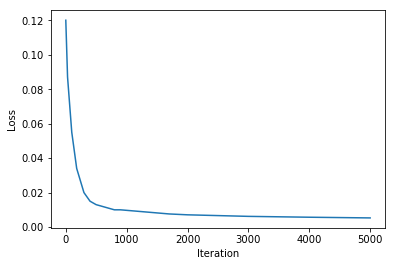

In [4]:
import matplotlib.pyplot as plt
iteartion = [1, 30, 99, 180, 299, 399, 499, 599, 699, 799, 899, 1699, 1999, 2999, 3999, 4999]
loss = [0.12, 0.087, 0.055, 0.034, 0.020, 0.015, 0.013, 0.012, 0.011, 0.010, 0.010, 0.0076, 0.0071, 0.0062, 0.0057, 0.0053]
plt.plot(iteartion, loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

| iteration #| loss   |
|------------|--------|
|1           |0.12    |
|30          |0.087   |
|99          |0.055   |
|180         |0.034   |
|299         |0.020   |
|399         |0.015   |
|499         |0.013   |
|599         |0.012   |
|699         |0.011   |
|799         |0.010   |
|899         |0.010   |
|1699        |0.0076  |
|1999        |0.0071  |
|2999        |0.0062  |
|3999        |0.0057  |
|4999        |0.0053  |
For the cat image with default learning rate being 0.01. It starts with 0.1 and decreases rapidly to 0.01 for the first 900 iterations. And then decrease slower and slower as the iteration number increases. In 5000 iterations, it reaches 0.0053. And the image is look pretty much like a cat at this point. 

#### d. Can you make the network converge to a lower loss function by lowering the learning rate every 1,000 iterations? (Some learning rate schedules, for example, halve the learning rate every n iterations. Does this technique let the network converge to a lower training loss?)

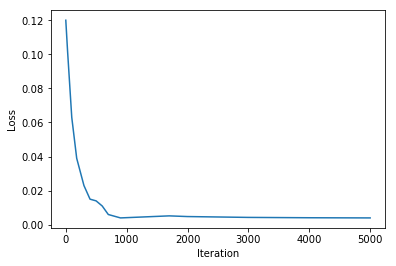

In [5]:
import matplotlib.pyplot as plt
iteartion = [1, 30, 99, 180, 299, 399, 499, 599, 699, 799, 899, 1699, 1999, 2999, 3999, 4999]
loss = [0.12, 0.102, 0.063, 0.039, 0.023, 0.015, 0.014, 0.011, 0.006, 0.005, 0.004, 0.0052, 0.0048, 0.0043, 0.0041, 0.0040]
plt.plot(iteartion, loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

| iteration #|new loss   |previous loss|
|------------|-----------|-------------|
|1           |0.12       |0.12         |
|30          |0.102      |0.087        |
|99          |0.063      |0.055        |
|180         |0.039      |0.034        |
|299         |0.023      |0.020        |
|399         |0.015      |0.015        |
|499         |0.014      |0.013        |
|599         |0.011      |0.012        |
|699         |0.006      |0.011        |
|799         |0.005      |0.010        |
|899         |0.004      |0.010        |
|1699        |0.0052     |0.0076       |
|1999        |0.0048     |0.0071       |
|2999        |0.0043     |0.0062       |
|3999        |0.0041     |0.0057       |
|4999        |0.0040     |0.0053       |

Yes, it does converge to a lower loss funciton after 5000 iterations. By scrolling the learning rate bar to from right to left over time, the learning rate decreases from 0.01 to 0.0001, and result table is shown above. Comparing the with the loss in the previous setting up, the new loss decreases slower for the a few iterations at the begining but performes better in the end, which keeps decreasing faster than before. This technique works in this way because it is far from the original image at the beginning, so for each iteraion, we should go for a large step to approach the original image, and as we are getting closer to the original image, we should be more careful of taking a step further, in this case, by imposing a small learning rate is equal to take a small step. Obviously, the new loss after 5000 iterations becomes smaller than it was before, which makes perfect sense.

#### e. Lesion study. The text box contains a small snippet of Javascript code that initializes the network. You can change the network structure by clicking the “Reload network” button, which simply evaluates the code. Let’s perform some brain surgery: Try commenting out each layer, one by one. Report some results: How many layers can you drop before the accuracy drops below a useful value? How few hidden units can you get away with before quality drops noticeably?

By keep learning rate being 0.01, we start from removing one hidden layers to removing all hidden layers, the learning speed of the follwoing model is in an asendling order:
- If we removed 1 hidden layers, its loss stucks around 0.0039 after 15000 iteartions.
- If we removed 2 hidden layers, its loss stucks around 0.0042 after 15000 iteartions.
- If we removed 3 hidden layers, its loss stucks around 0.0048 after 15000 iteartions.
- If we removed 4 hidden layers, its loss stucks around 0.0055 after 15000 iteartions.
- If we removed 5 hidden layers, its loss stucks around 0.0105 after 15000 iteartions, the difference of the error becomes noticeable, and it is possible to say the accuracy has dropped below a userful value.
- If we removed 6 hidden layers, its loss stucks around 0.0243 after 15000 iteartions, now the accuracy becomes far than useful in the context.
- If we removed 7 hidden layers, its loss stucks around 0.0687 after 15000 iterations, which seems completely meaningless.
<br>In conclusion, we can drop 6 layers before the accuracy drops below a useful value (error below 0.05 in this case). And we can take away 4 hidden units before quality drops noticeably.

#### f. Try adding a few layers by copy+pasting lines in the network definition. Can you noticeably increase the accuracy of the network?

We added 5 more layers. The learning speed is getting verly slower, and the loss is getting worse than before. In 2999 iterations, it has loss of 0.0065 compareing to 0.0062 for 7 hidden layer model. It seems that the accuracy is dependent on the data itself, so the only way to tell how many layers do we need is actually trying out all the possible space in order to find out the optimal number of layers. But in practice, we believe this cat image will need 6-7 layers to give the best performance.